<a href="https://colab.research.google.com/github/desaivishwas/D590_Project/blob/main/IndianCinema_thruData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indian Cinema through Data

#### Submitted by Vishwas Desai and Swet Shah for DSCI D590 Project Work


## Overview
`The purpose of this visualization is to examine many factors that contribute to a film's success. A commercial film can not only delight the audience, but it can also produce a lot of money for its makers. A strong director, good performers, a good production house, technicians such as editors/cinematographers, and the date of the film's release are all important elements in deciding whether or not it will earn money. Indian cinema, one of the world's oldest theaters, is a wide phrase that refers to a number of film industries in India, most of which are divided by languages and regions. Our major focus will be on the Hindi film business, also known as Bollywood. With this project, we intend to visually investigate what makes a Bollywood film successful..`



In [236]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import wordcloud
import datetime
from IPython.display import HTML
# import plotly.express as px
# import plotly.io as pio
# pio.renderers.default='colab'

## Reading `bollywood_full.csv`

`bollywood_full.csv` si the dataset we are using for this visualization project. It is small datstet of Bollywodd movies form the years 1950 till 2019 having attirbutes like `original_title` , `imdb_id`, `year_of_release`, `runtime`, `genres`, `imdb_rating`, `actors`, `wins_nominations` 


[Documentaion](https://github.com/pncnmnp/TIMDB)

In [237]:
movies = pd.read_csv('/content/bollywood_full.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4330 entries, 0 to 4329
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_x           4330 non-null   object 
 1   imdb_id           4330 non-null   object 
 2   poster_path       3580 non-null   object 
 3   wiki_link         4330 non-null   object 
 4   title_y           4330 non-null   object 
 5   original_title    4330 non-null   object 
 6   is_adult          4330 non-null   int64  
 7   year_of_release   4330 non-null   object 
 8   runtime           4330 non-null   object 
 9   genres            4330 non-null   object 
 10  imdb_rating       4317 non-null   float64
 11  imdb_votes        4317 non-null   float64
 12  story             4065 non-null   object 
 13  summary           4329 non-null   object 
 14  tagline           685 non-null    object 
 15  actors            4320 non-null   object 
 16  wins_nominations  1344 non-null   object 


In [238]:
movies.head()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)


### The datset needs cleaning, first we removed unwanted columns for the dataset like `poster_path`, `wiki_link`, `summary` and so on

### These attributes were moslty categorical and was not valuable for the visulizations we had aimed for

In [239]:
movies = movies.drop(columns=['poster_path', 'wiki_link', 'summary', 'tagline', 'title_x', 'title_y', 'story', 'release_date'])

#### Renaming column names for ease of use

We had to rename a few column names in our dataset for easier readabilty and usage

In [240]:
movies = movies.rename(columns={"original_title":"title", "wins_nominations": "awards", "year_of_release":"year"})

In [241]:
# movies['year'].str.count('N').sum()
movies['year'] = movies['year'].replace('N','', regex=True)
movies = movies.replace(r'\\','', regex=True)
movies = movies.replace('N','', regex=True)

## Checking for null values in the dataset

In [242]:
movies.isnull().sum()

imdb_id           0
title             0
is_adult          0
year              0
runtime           0
genres            0
imdb_rating      13
imdb_votes       13
actors           10
awards         2986
dtype: int64

### Replacing the null vlaues with 0

In [243]:
movies = movies.fillna(0)

In [244]:
# checking again for null values
movies.isnull().sum()

imdb_id        0
title          0
is_adult       0
year           0
runtime        0
genres         0
imdb_rating    0
imdb_votes     0
actors         0
awards         0
dtype: int64

In [245]:
movies.head()

,imdb_id,title,is_adult,year,runtime,genres,imdb_rating,imdb_votes,actors,awards
0,tt8291224,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112.0,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins
1,tt9472208,Battalion 609,0,2019,131,War,4.1,73.0,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,0
2,tt6986710,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549.0,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,0
3,tt8108208,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891.0,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,0
4,tt6028796,Evening Shadows,0,2018,102,Drama,7.3,280.0,Mona Ambegaonkar|Ananth arayan Mahadevan|Devan...,17 wins & 1 nomination


 **NOTE:** 
 *The dataset looks tidy:
null values have been replaced, escape charcters, whitesapces have been removed*

In [246]:
display(movies.describe())

,is_adult,imdb_rating,imdb_votes
count,4330.0,4330.000000,4330.000000
mean,0.0,5.893995,2380.705774
std,0.0,1.366904,9390.904459
min,0.0,0.000000,0.000000
25%,0.0,5.100000,32.000000
50%,0.0,6.100000,130.000000
75%,0.0,6.900000,961.250000
max,0.0,9.400000,310481.000000


## Number of movies relesed per decade

Our first visulizaion is about the number of movies release every decade form 1950 -2019

In [247]:
 counts = movies['year'].value_counts().to_frame("counts")

In [248]:
counts = counts.rename_axis("year", axis="columns")
counts.sort_index().head()

year,counts
,2
1950,15
1951,17
1952,17
1953,18


Text(0, 0.5, '# of moviees released')

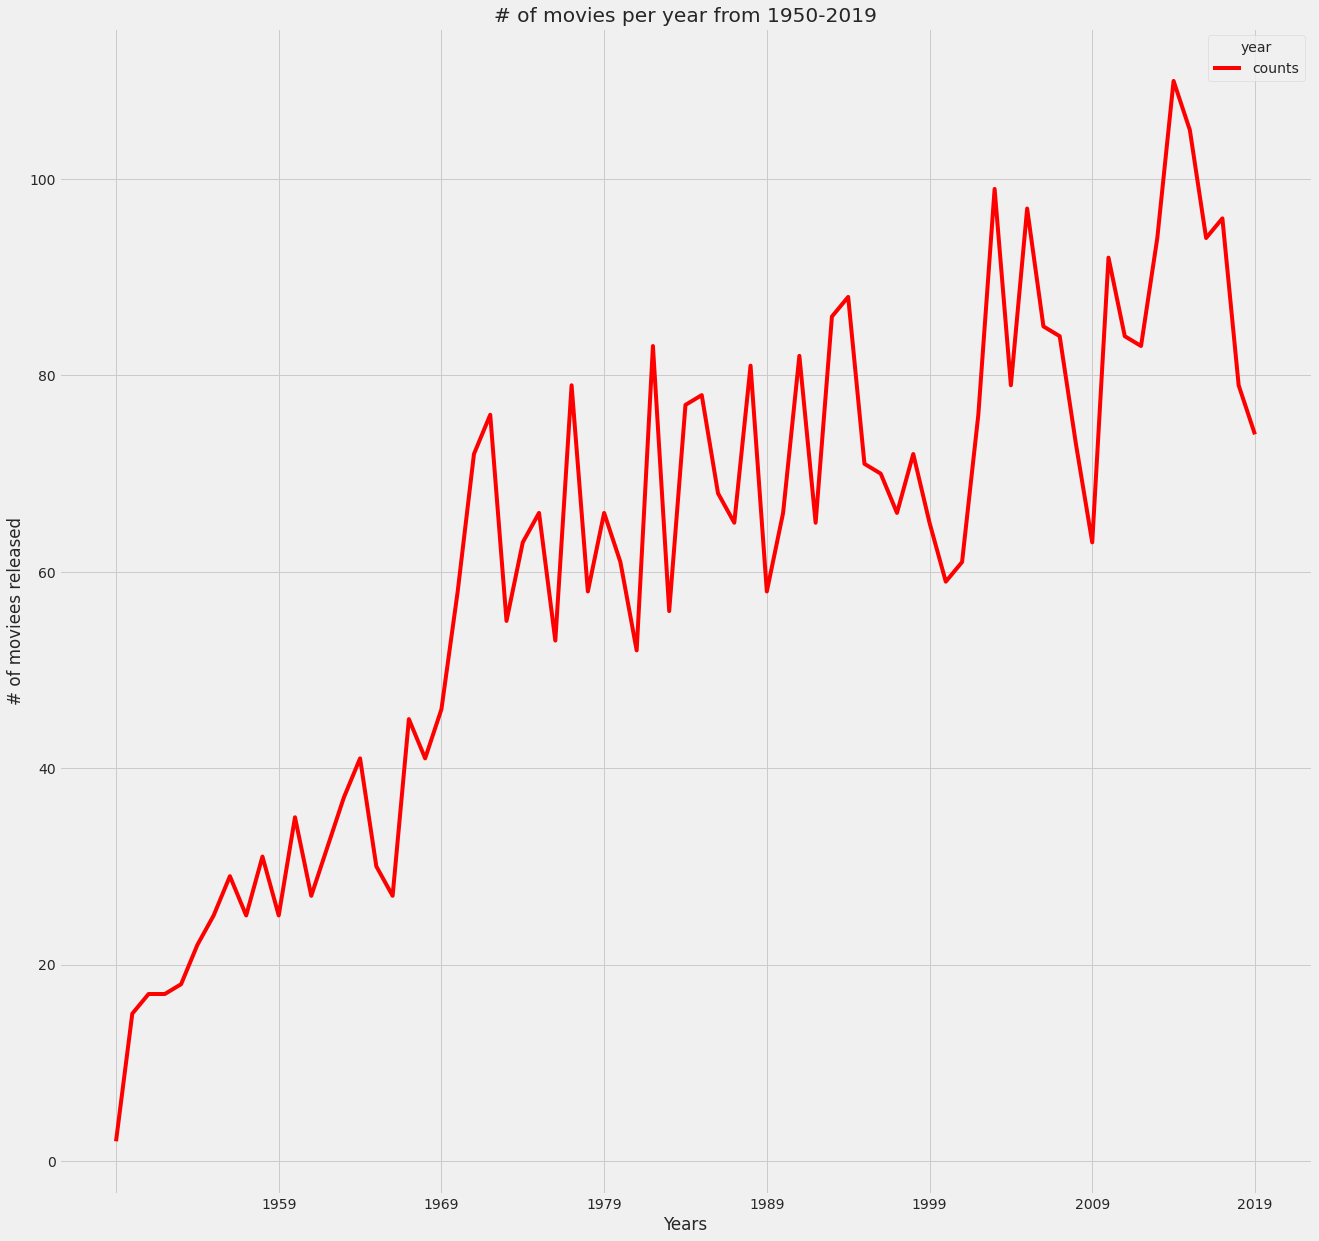

In [249]:
ax = counts.sort_index().plot(kind='line', figsize = (20, 20), title='# of movies per year from 1950-2019', c='red')
ax.set_xlabel("Years")
ax.set_ylabel("# of moviees released")

## Visualization-based insights:

The lineplot offers us a quick overview of how Bollywood movies have changed over time.
- It is projected that just 10-12 movies were made and released for public consumption during the start of the 1950s. This is in keeping with the country's and industry's socio-political and economic realities. India was a young country, having earned independence in 1947, and the movie industry, which was only two decades old at the time, was never viewed as a viable source of revenue or employment.
- The number of releases increased as the country's economic conditions improved.
- The lineplot shows a sharp spike between 1969 and 1977, which tells us two things:
  1. The movie industry had a higher per capita income, allowing it to produce more films.
  2. The country's economic status had improved.

  This was also the time when the Bollywood industry began to export its films to other "Third World Countries" that shared many  political, economic, and cultural similarities with India, and the Bollywood films represented those themes. 

  [An intresting read about Bollywod movies and the Soviet Union](https://www.varsity.co.uk/film-and-tv/17664)

- A substantial increase in movie releases can be seen between 1990 and the early 2000s. This was the period of liberalization in India's economy, and the Bollywood business was one of the key beneficiaries of this period of liberalization. Several international companies, notably Disney and Sony, established operations in India to produce Bollywood films.

  [For more info on Economic liberalization of 1991 and Bollywood](https://www.livemint.com/Consumer/BVVx6EV79uZcrkZBgAky3H/The-liberalization-of-Bollywood.html)


## Genreating a WordCloud for movie genres

### The purpose of creating a wordcloud is to obtain which genres are the most viewed and liked byt the mvoie going audience

In [250]:
unique_genres = []
for i in range(len(movies)):
    genres = movies.at[i, 'genres']
    for genre in genres.split('|'):
        if genre not in unique_genres:
            unique_genres.append(genre)

In [251]:
movie_df = movies.copy()
total = len(movies)
for genre in unique_genres:
    movie_df[genre] = [0] * total

for i in range(len(movies)):
    genres = movie_df.at[i, 'genres']
    for genre in genres.split("|"):
        movie_df.at[i, genre] = 1

In [252]:
movie_df.head(2)

,imdb_id,title,is_adult,year,runtime,genres,imdb_rating,imdb_votes,actors,awards,Action,Drama,War,Biography,Crime,Comedy,Horror,Thriller,Music,Adventure,Mystery,Romance,Sport,History,Family,Fantasy,Documentary,Short,Sci-Fi,Musical,Animation,,Western
0,tt8291224,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112.0,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt9472208,Battalion 609,0,2019,131,War,4.1,73.0,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


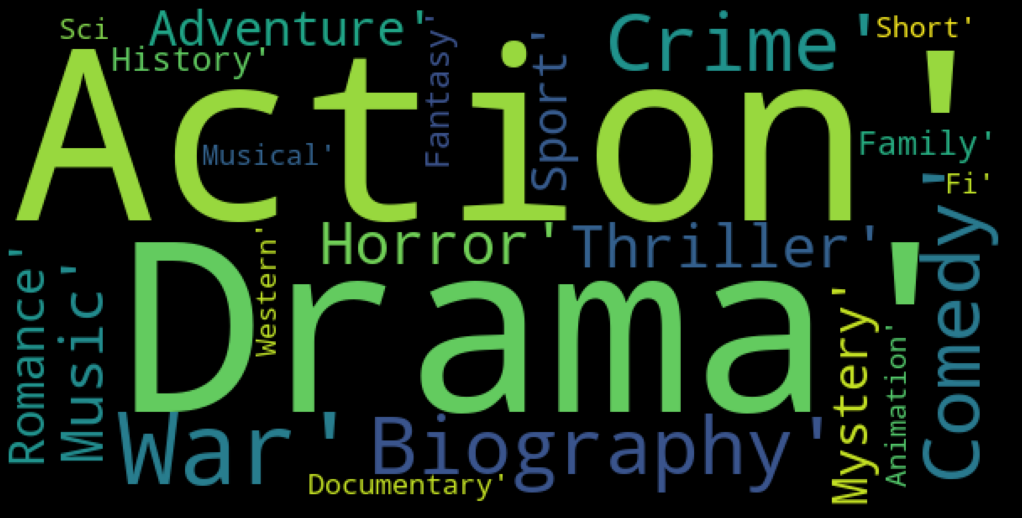

In [253]:
from wordcloud import WordCloud

# plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='black', width=600, height=300, max_font_size=150, 
                      max_words=200).generate(str(unique_genres))
wordcloud.recolor(random_state=0)
plt.figure(figsize = (14, 10),facecolor='k')
# plt.title("Wordcloud for gneres", fontsize=30)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Insights based on WordCloud

#### The word cloud highlights that Drama and Action are the most popular genres among Bollywood moviegoers, as proven by the overwhelming number of films produced in the category.
---
Inconsistencies and the difficulty of dealing with numerous genres

- It is common knowledge that many films cannot be classified into a single genre. Regardless of the language spoken in the films, this is true. The majority of these genres are grouped, which might be problematic when analyzing genre data from a movie dataset.

- To circumvent this problem, we were able to create a list of distinct genres based on the number of IMDb votes each genre received. One hot encoding solved the problem of binarizing many genres.

## An histogram for imdb_rating column

In [254]:
ratings_df = movies.sort_values(by= 'imdb_rating', ascending=False)

In [255]:
display(ratings_df['imdb_rating'].describe())

count    4330.000000
mean        5.893995
std         1.366904
min         0.000000
25%         5.100000
50%         6.100000
75%         6.900000
max         9.400000
Name: imdb_rating, dtype: float64

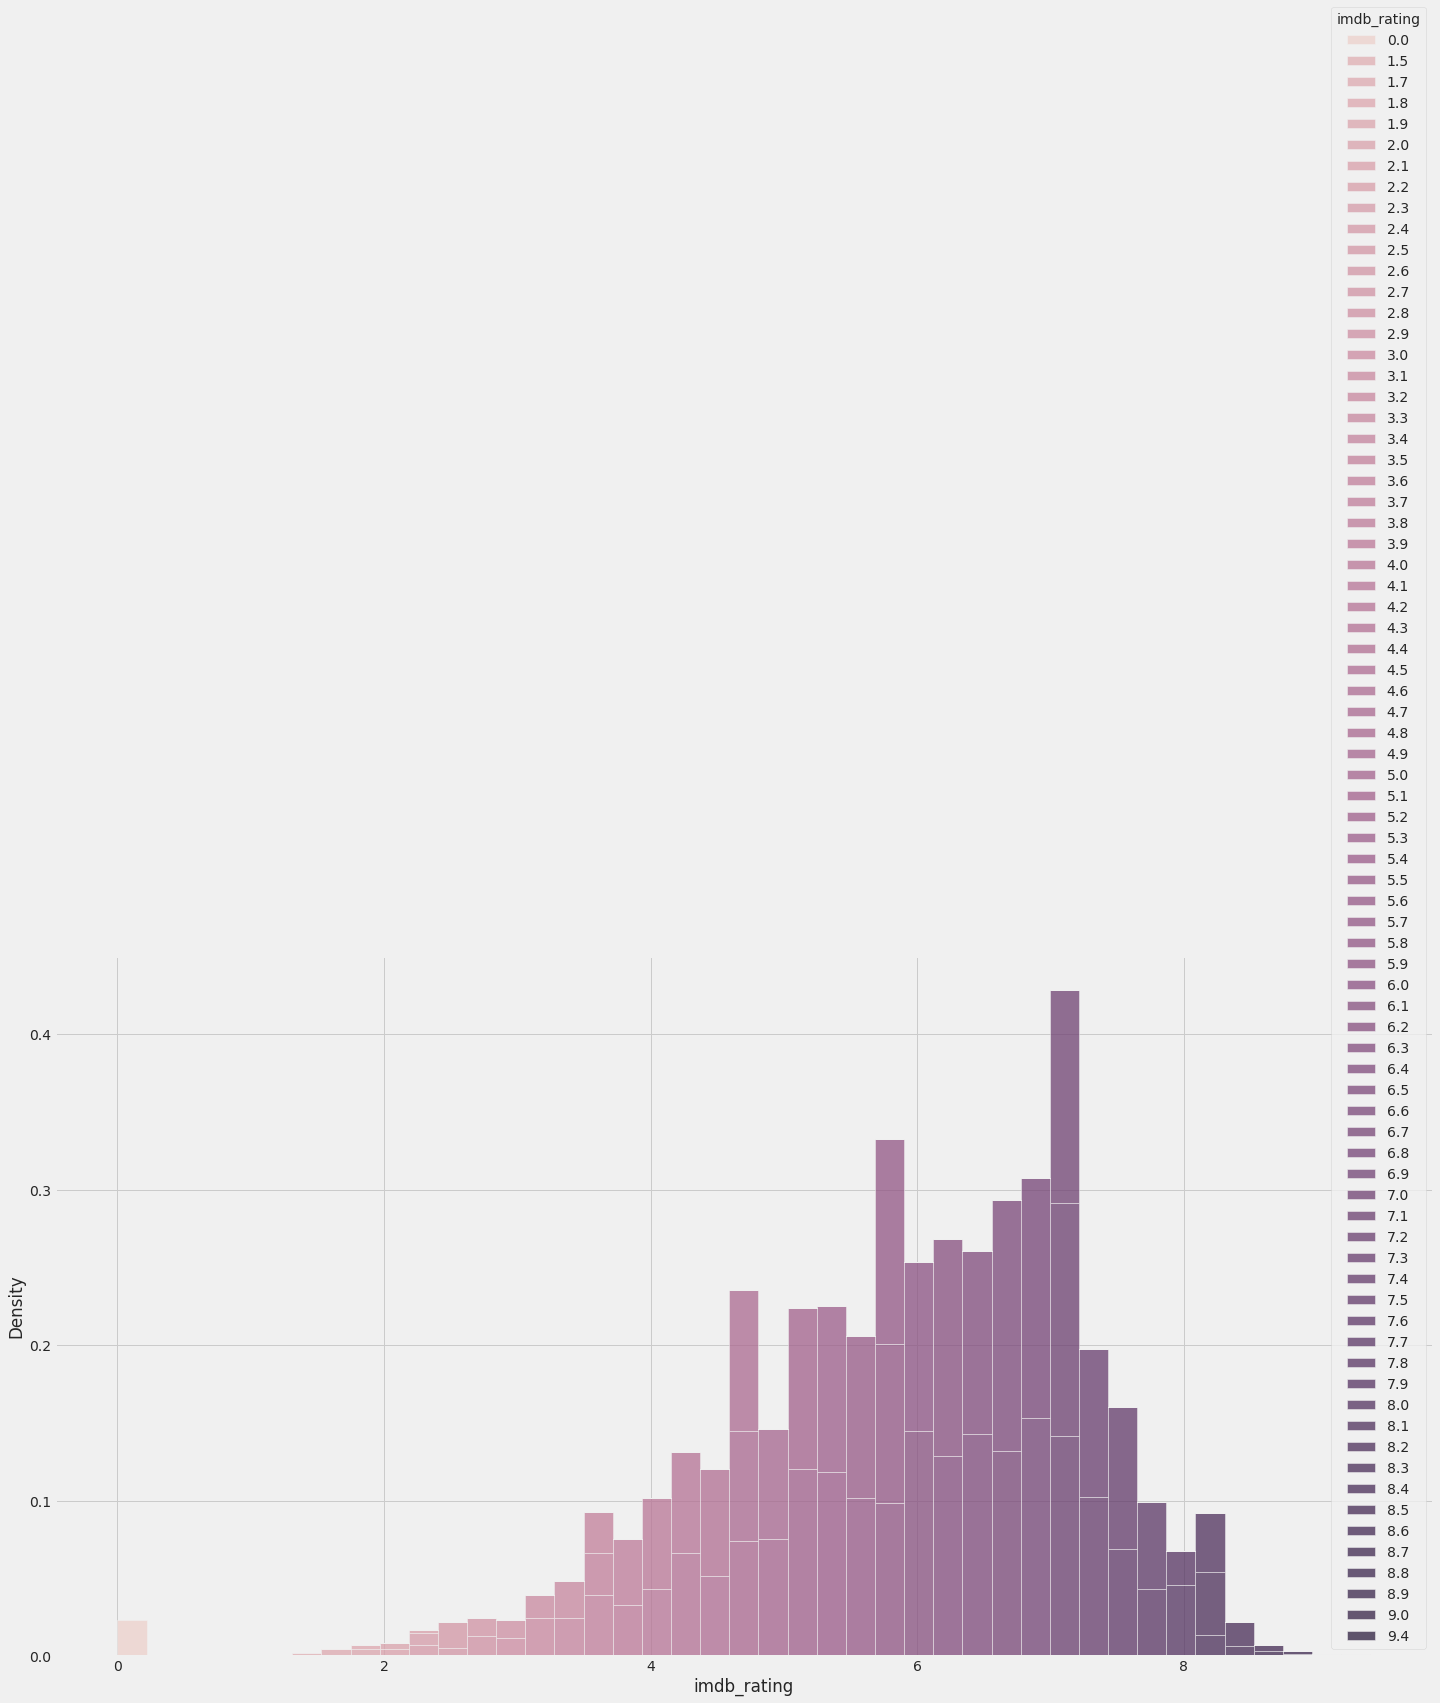

In [256]:
plt.figure(figsize=(22,12))
sns.histplot(data=ratings_df, x='imdb_rating', hue='imdb_rating', stat="density",multiple="stack")

## Histogram based insights

- From the above histogram, it is clear that there are a few outliers in the imdb_rating column

- Also, a lot of movies in the dataset have a rating in the range of 6 to 8

## Finding the 10 highest rated movies in the data

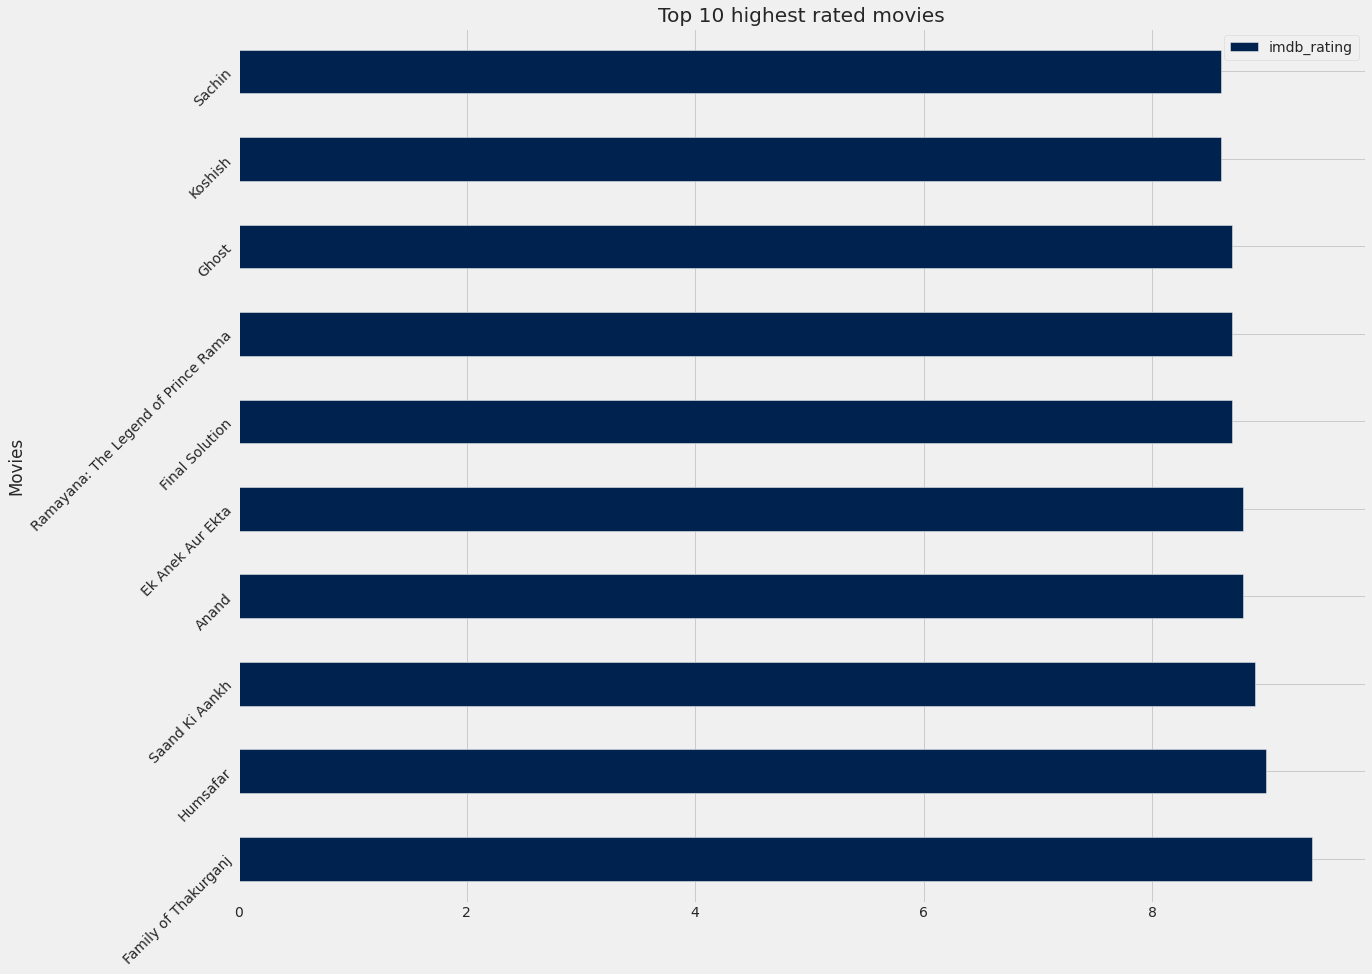

In [257]:
top10_df = ratings_df[:10]
top10_df.plot(x="title", y="imdb_rating", kind="barh", figsize=(18, 15), colormap='cividis', xlabel = "Movies", ylabel= "IMDb Rating", title="Top 10 highest rated movies", rot = 45)

## Bar Plot based insights

The curious case of biases in the data

- From the bar plot, we get the top 10 highest rated movies in the dataset

- while it is not evident for those who do not follow Bollywood, all these movies are relatively unknown and most of them just barely qualify as a movie (The movie "Sachin" is a documentary that premiered in theatres and not on any streaming platforms)

- Now, we come to the faults in the data, IMDb calculates a movie's rating based on the number of votes it received i.e

              Avg Rating =  summation of all ratings/summation of votes

- So, the data is skewed for movies that have fewer votes but a higher rating per vote. This is the case with our graph.

- Our highest-rated film, 'Family of Thakurgunj,' has an average IMDb rating of 9.4, but the total number of votes it has received is just 1600, proving that our presumption that it is the highest-rated film is inaccurate.



## How to rectify it?

One method to fix issue is to sort the dataset descending by both the 'imdb votes' and imdb rating columns to find the top rated movies with the most votes. This will provide us with a more accurate picture of Bollywood moviegoers' likes.

# The actual top 10 highest rated Bollywood movies in the data

In [258]:
ratings_df = ratings_df.sort_values(['imdb_votes', 'imdb_rating'], ascending=[False, False])

In [259]:
ratings_df.head()

,imdb_id,title,is_adult,year,runtime,genres,imdb_rating,imdb_votes,actors,awards
916,tt1187043,3 Idiots,0,2009,170,Comedy|Drama,8.4,310481.0,Aamir Khan|Madhavan|Sharman Joshi|Kareena Kapo...,57 wins & 18 nominations
1131,tt0986264,Taare Zameen Par,0,2007,165,Drama|Family,8.4,148498.0,Darsheel Safary|Aamir Khan|Tisca Chopra|Vipin ...,18 wins & 8 nominations
569,tt2338151,PK,0,2014,153,Comedy|Drama|Fantasy,8.1,143605.0,Aamir Khan|Anushka Sharma|Saurabh Shukla|Sanja...,14 wins & 15 nominations
354,tt5074352,Dangal,0,2016,161,Action|Biography|Drama,8.4,131338.0,Aamir Khan|Fatima Sana Shaikh|Sanya Malhotra|S...,23 wins & 4 nominations
1201,tt0405508,Rang De Basanti,0,2006,167,Comedy|Drama,8.2,103071.0,Aamir Khan|Siddharth|Sharman Joshi|Kunal Kapoo...,ominated for 1 BAFTA Film Award


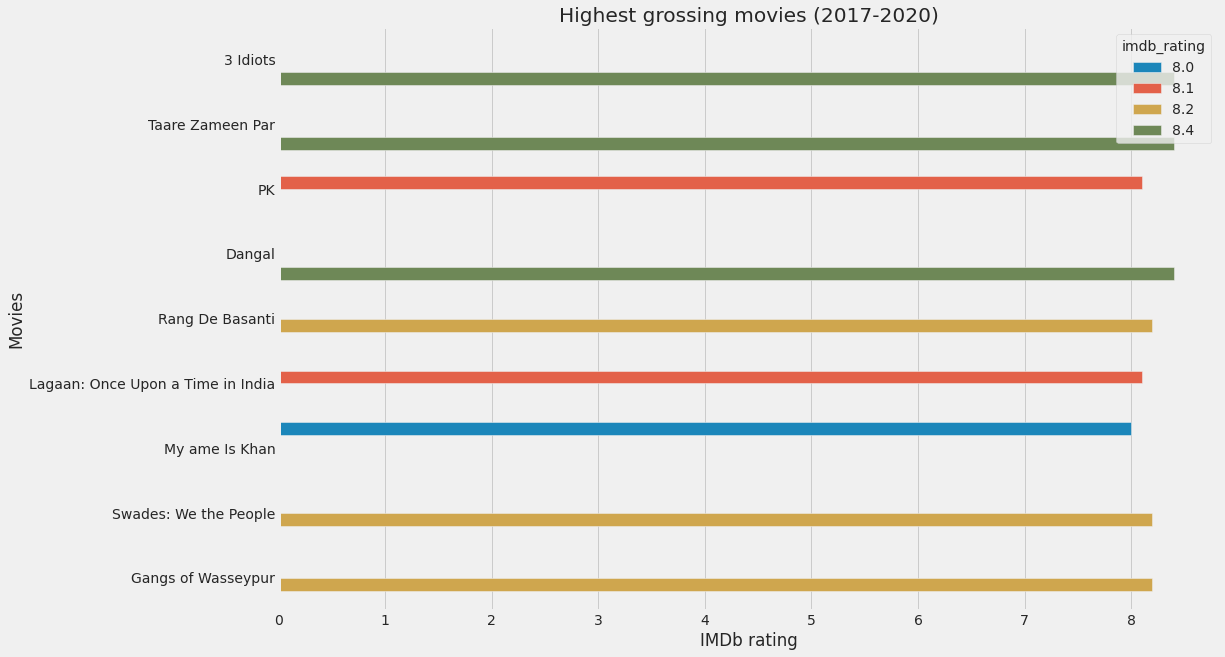

In [260]:
actual_top10_df = ratings_df[:10]
plt.figure(figsize=(15,10))
sns.barplot(y="title",x="imdb_rating",data=actual_top10_df, hue="imdb_rating")
plt.title('Highest grossing movies (2017-2020)', loc='center', pad=5)
plt.ylabel("Movies")
plt.xlabel("IMDb rating")
plt.show()

## A typical Bollywood moviegoer would undoubtedly agree with the barplot visualized above.

# Bollywood and its love for movies with longer runtimes

Bollywood movies have always been lengthy stretching up to 3 hours and with a concept of an "Interval" which is scheduled exactly at the half length of the movie.

- This concept of "Interval" is pretty unique to Indian Cinema and is an alien concept to many outside of India

- We aim to gauge the trends in movie runtimes over the year for the Bollywood movies in our datasets- A typical Bollywood moviegoer would undoubtedly agree with the plot described above.

In [261]:
runtime_df = movies.copy()
runtime_df['runtime'] = pd.to_numeric(runtime_df['runtime'], errors='raise')
# runtime_df = movies.sort_values('runtime', ascending=False)

In [262]:
runtime_df = runtime_df.drop_duplicates()

In [263]:
runtime_df = runtime_df.sort_values('runtime', ascending=False)

In [264]:
display(runtime_df['runtime'].describe())

count    3369.000000
mean      140.016622
std        23.439954
min         7.000000
25%       126.000000
50%       140.000000
75%       155.000000
max       321.000000
Name: runtime, dtype: float64

Text(0, 0.5, 'Number of Movies')

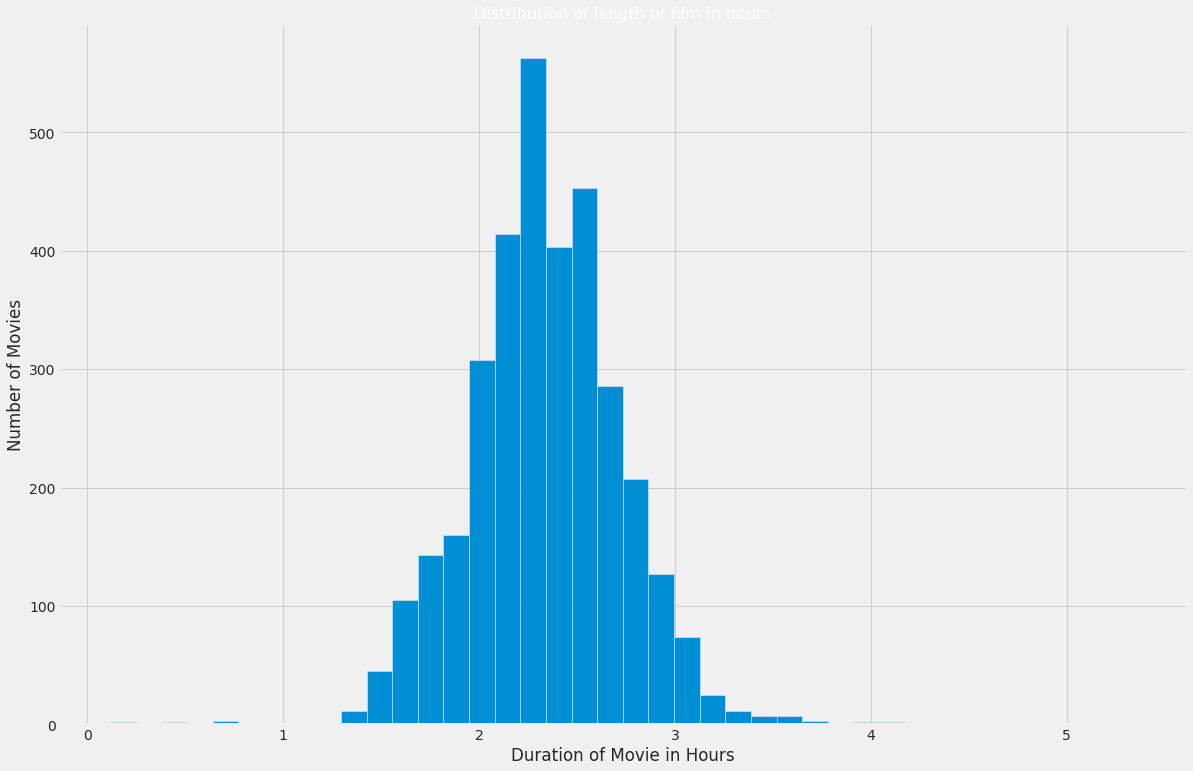

In [265]:
plt.figure(figsize=(18,12))
plt.hist(runtime_df['runtime']/ 60, bins=40);
plt.title('Distribution of length of film in hours', fontsize=16, color='white');
plt.xlabel('Duration of Movie in Hours')
plt.ylabel('Number of Movies')

## Histplot based insights:

- There are approximately 1500 movies in our dataset having runtimes ranging between 2-3 hours

- We plot another hist based on runtime in minutes to get an average runtime as accurately as possible

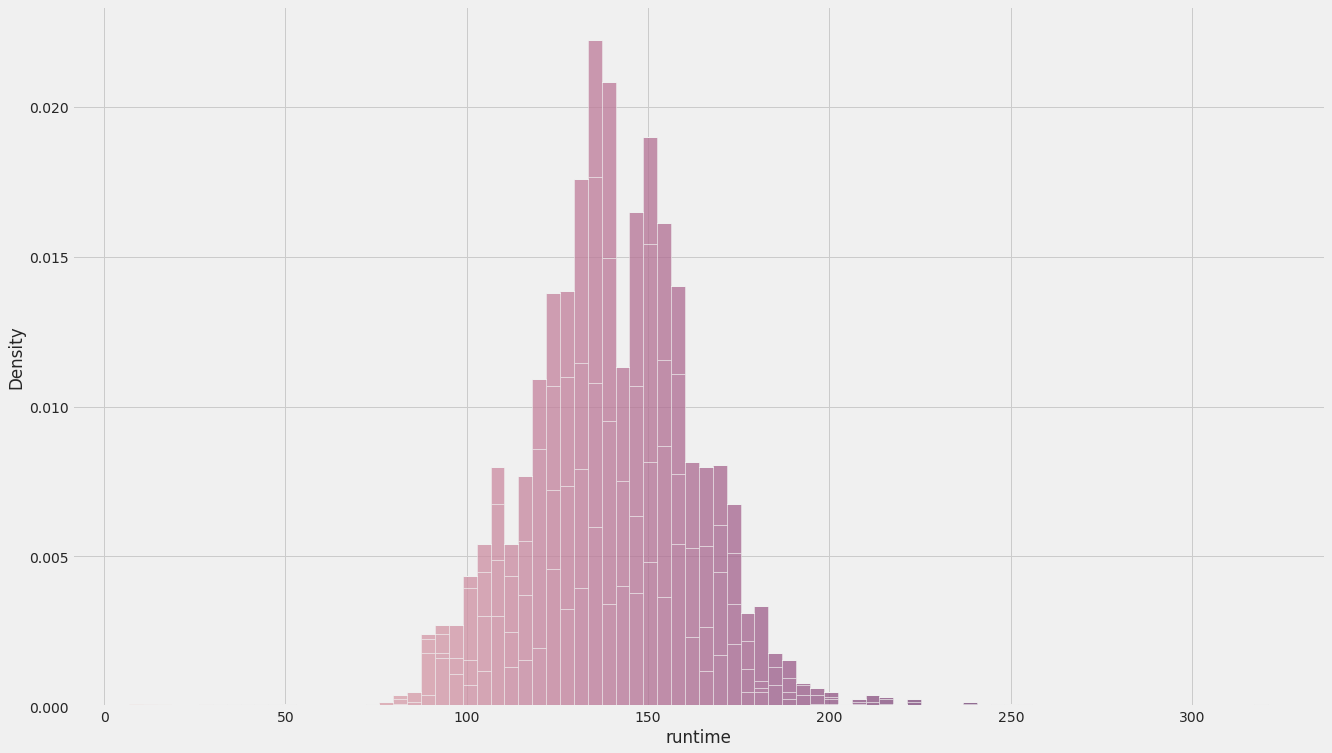

In [266]:
# ax =runtime_df['runtime'].histplot(kind='hist',bins=10)
plt.figure(figsize=(20,12))
sns.histplot(data=runtime_df, x='runtime', hue="runtime",  stat="density",multiple="stack", legend=False)


## Histplot based insights:

- From the above hist plot, we gauge that Bollywood movies in our dataset have an average runtime of over 140+ minutes.


- This average runtime for Bollywood movies is approx 40+ minutes more than the average runtime for movies made in Hollywood.


[Reference](https://towardsdatascience.com/are-new-movies-longer-than-they-were-10hh20-50-year-ago-a35356b2ca5b#:~:text=The%20most%20popular%20runtime%20is,is%2080%E2%80%93120%20minutes%20long.)

#Top 10 longest Bollywood movies sorted by runtime (in mins) 

In [267]:
top10_runtime = runtime_df[:10]

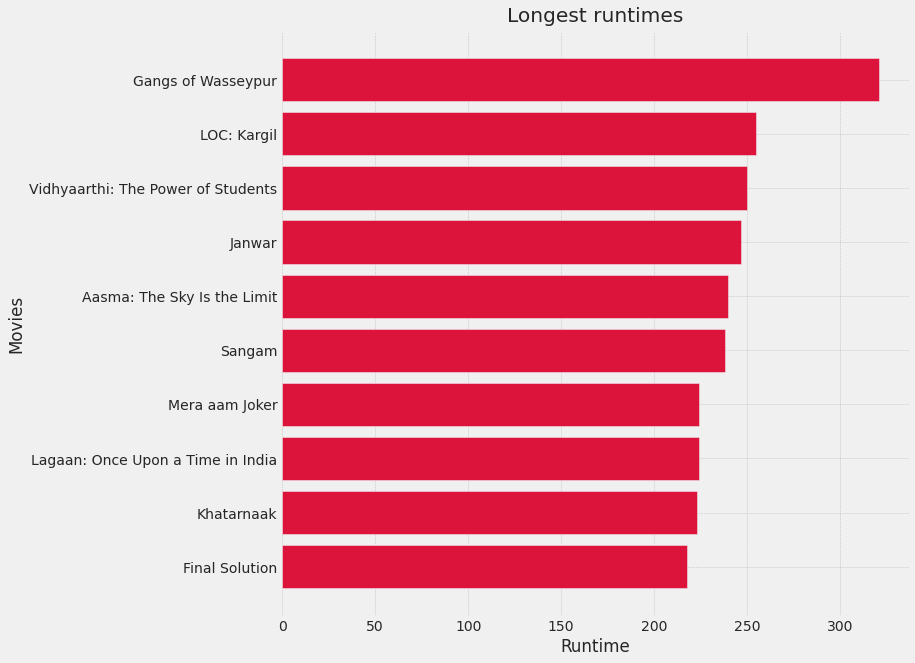

In [268]:
# Figure Size
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(width = top10_runtime.runtime,y= top10_runtime.title, color='crimson')

for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=5)

# Add x,y gridlines
ax.grid(b=True, color='black', linestyle='--', linewidth=0.5, alpha=0.2)

# Show top values 
ax.invert_yaxis()

# x and y labels
plt.xlabel("Runtime")
plt.ylabel("Movies")

# Add Plot Title
ax.set_title('Longest runtimes', pad=10)
plt.show()

## The outlandish runtime of Gangs of Wasseypur

- As we see from the barplot, the longest Bollywood movie is Gangs of Wasseypur having an approx runtime of 321 minutes, i.e. just over 5 hours.

- Though the movie was released as 2 parters, IMDb considers the runtime when it was first screened at the Cannes film festival as its official runtime. 

- According to the wiki of gangs of Wasseypur
> Both parts were originally shot as a single film measuring a total of 321 minutes and screened at the 2012 Cannes Directors' Fortnight, but, since no Indian theatre would volunteer to screen a more-than-five-hour film, it was split into two parts for that market.

[Wiki link](https://en.wikipedia.org/wiki/Gangs_of_Wasseypur)



## Relationship between runtimes and rating

Through this scatterplot, we try to gauge any relation between movie runtimes and its average rating

Text(0.5, 1.0, 'Runitmes v Rating for top 10 lenghty movies')

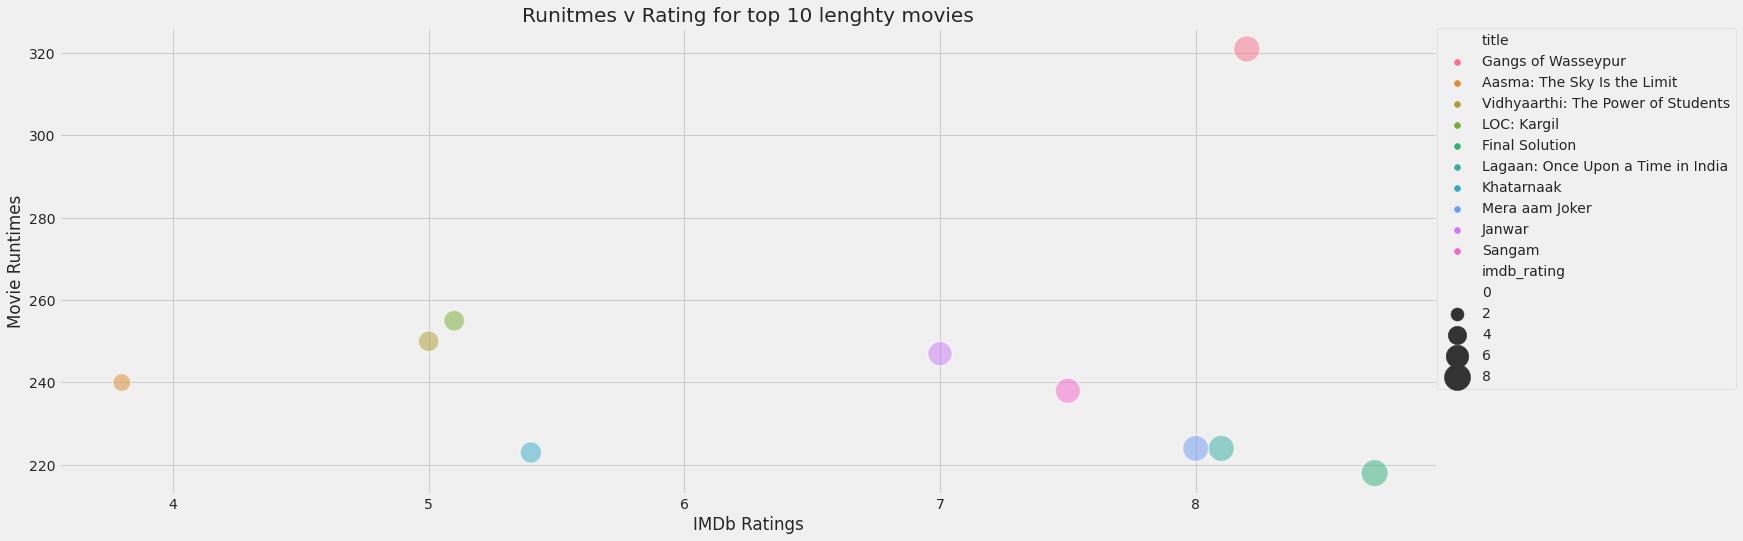

In [269]:
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (22, 8))
# order =[1,2,3,4,5,6,7,7.5,8,8.5,9,9.5,10]
sns.scatterplot(y = "runtime", x = "imdb_rating", data = runtime_df, size= "imdb_rating", hue=top10_runtime['title'], alpha=0.5,sizes=(0, 800), legend="auto")
plt.legend(loc=2, bbox_to_anchor=(1, 1), borderaxespad=0)
plt.ylabel("Movie Runtimes")
plt.xlabel("IMDb Ratings")
plt.title("Runitmes v Rating for top 10 lenghty movies")

### Insights from scatterplots

- The majority of the top ten lengthy films have an average rating of 7.0 or above.
- The above graph is inconclusive as to whether there is a correlation between longer runtimes and higher ratings.

## Failed experiment #1

- ### We made API calls to the IMDb database through IMDbPY to get important attributes like budget and box office in our bollywood_full.csv dataset

- ### Obtaining budget and box office data for the dataset would have revealed a number of relevant elements such as the link between runtimes, movie release dates, cast/crew relationships, and so on.

- ### Though we were able to collect budget and box office figures for the films, the majority of them were null values, and in certain cases, movies and box office figures were lacking budget figures.

- ### This illustrates the main issue with data collection for Bollywood or Indian films in general: there is no proper data accounted for throughout the years, at least not in one source, and even if they do exist, the majority of the data from multiple sources contradict each other.


## Looking for other sources of data


- Since our efforts to get data for budget and box office were uneventful, we researched other sources of data for Bollywood movies.

- We obtained `bollywood_box_clean.csv` from Kaggle

- The problem with the dataset is that it is confined to films released between 2017 and 2020 and lacks a budget column, making our goal of establishing relationships between profit and other variables difficult.

-----
# Reading `bollywood_box_clean.csv`

### The cleaned datset has movies from the year 2017 to 2020 with important coumns like box offcie that we intend to use. It also has other attributes like `movie_name`, `movie_total`	, `movie_total_worldwide`, 	`movie_genre`	`movie_director`,	`release_year`,	`runtime`


---
*Notes about the data: The datset is lited to movies releaseed in the last few year. The fingings and  the visulizations will be biased and not the gnereal overiew if Bollyowod movies.*


## Analysis of Bollywod movies based on its box-office returns




Note: The currency used in the data is in INR. Multiple attemots to convert INR to USD failed since resultant values ontained was not accurate

In [270]:
data = pd.read_csv('/content/bollywood_box_clean.csv')
data.head(3)

,movie_name,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_total_worldwide,movie_genre,movie_director,release_date,release_day,release_month,release_year,runtime,producer,banner,actors,movie_details
0,Angrezi Medium,4.03,9.03,9.36,9.36,13.5,"Drama, Comedy",Homi Adajania,"13 March, 2020",13,Mar,2020,145,"Dinesh Vijan , Jyoti Deshpande","Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor",When his daughter decides to further her studi...
1,Baaghi 3,17.50,53.83,90.67,93.37,137.0,Action,Ahmed Khan,"06 March, 2020",6,Mar,2020,147,Sajid Nadiadwala,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh",A man embarks on a bloody rampage to save his ...
2,Thappad,3.07,14.66,22.79,30.61,44.5,"Drama, Social",Anubhav Sinha,"28 February, 2020",28,Feb,2020,142,"Bhushan Kumar , Krishan Kumar, Anubhav Sinha","Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza",Thappad is a story of Amrita whose seemingly p...


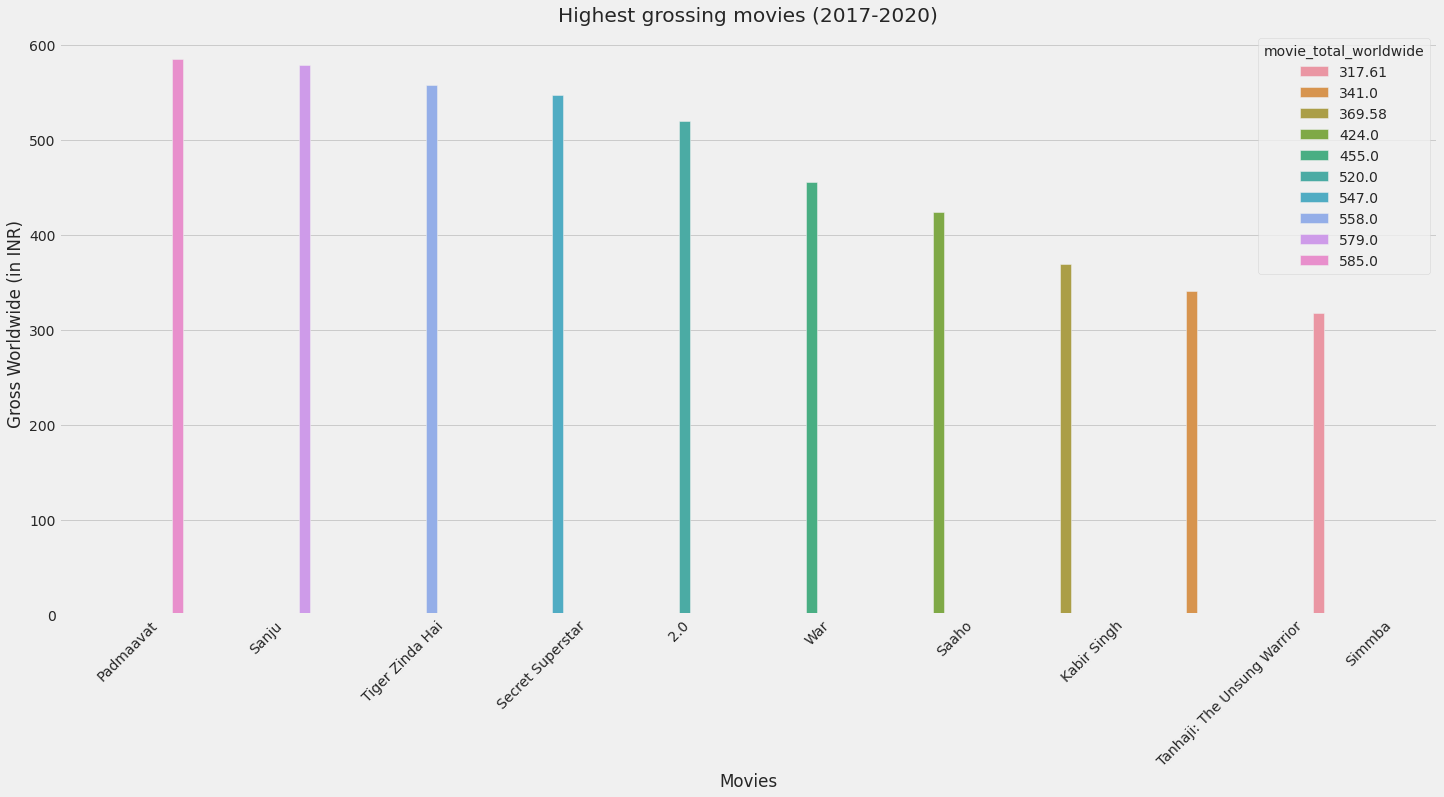

In [271]:
high_earning=data.sort_values('movie_total_worldwide', ascending = False)
high_earning=high_earning.head(10)
plt.figure(figsize=(22,10))
sns.barplot(y="movie_total_worldwide",x="movie_name",data=high_earning, hue="movie_total_worldwide")
plt.title('Highest grossing movies (2017-2020)', loc='center', pad=10)
plt.xticks(rotation=45)
plt.xlabel("Movies")
plt.ylabel("Gross Worldwide (in INR)")
plt.show()
# fig =px.bar(high_earning, y="movie_total_worldwide",x="movie_name",title="Top 10 Highest Box Office Collections ",color="movie_name", labels={'movie_name':"movies", "movie_total_worldwide":"Gross Worldwide"})
# HTML(fig.to_html())


## Insights:      

- Padmaavat is the highest grosser in the last few years
- Data is limted and bisased and the plot obtianed is not accurates in a genreal scenario

Note: According to wiki, Dangal is the highest grossing Bollywood movie

## Genre liked by the audience in recent years

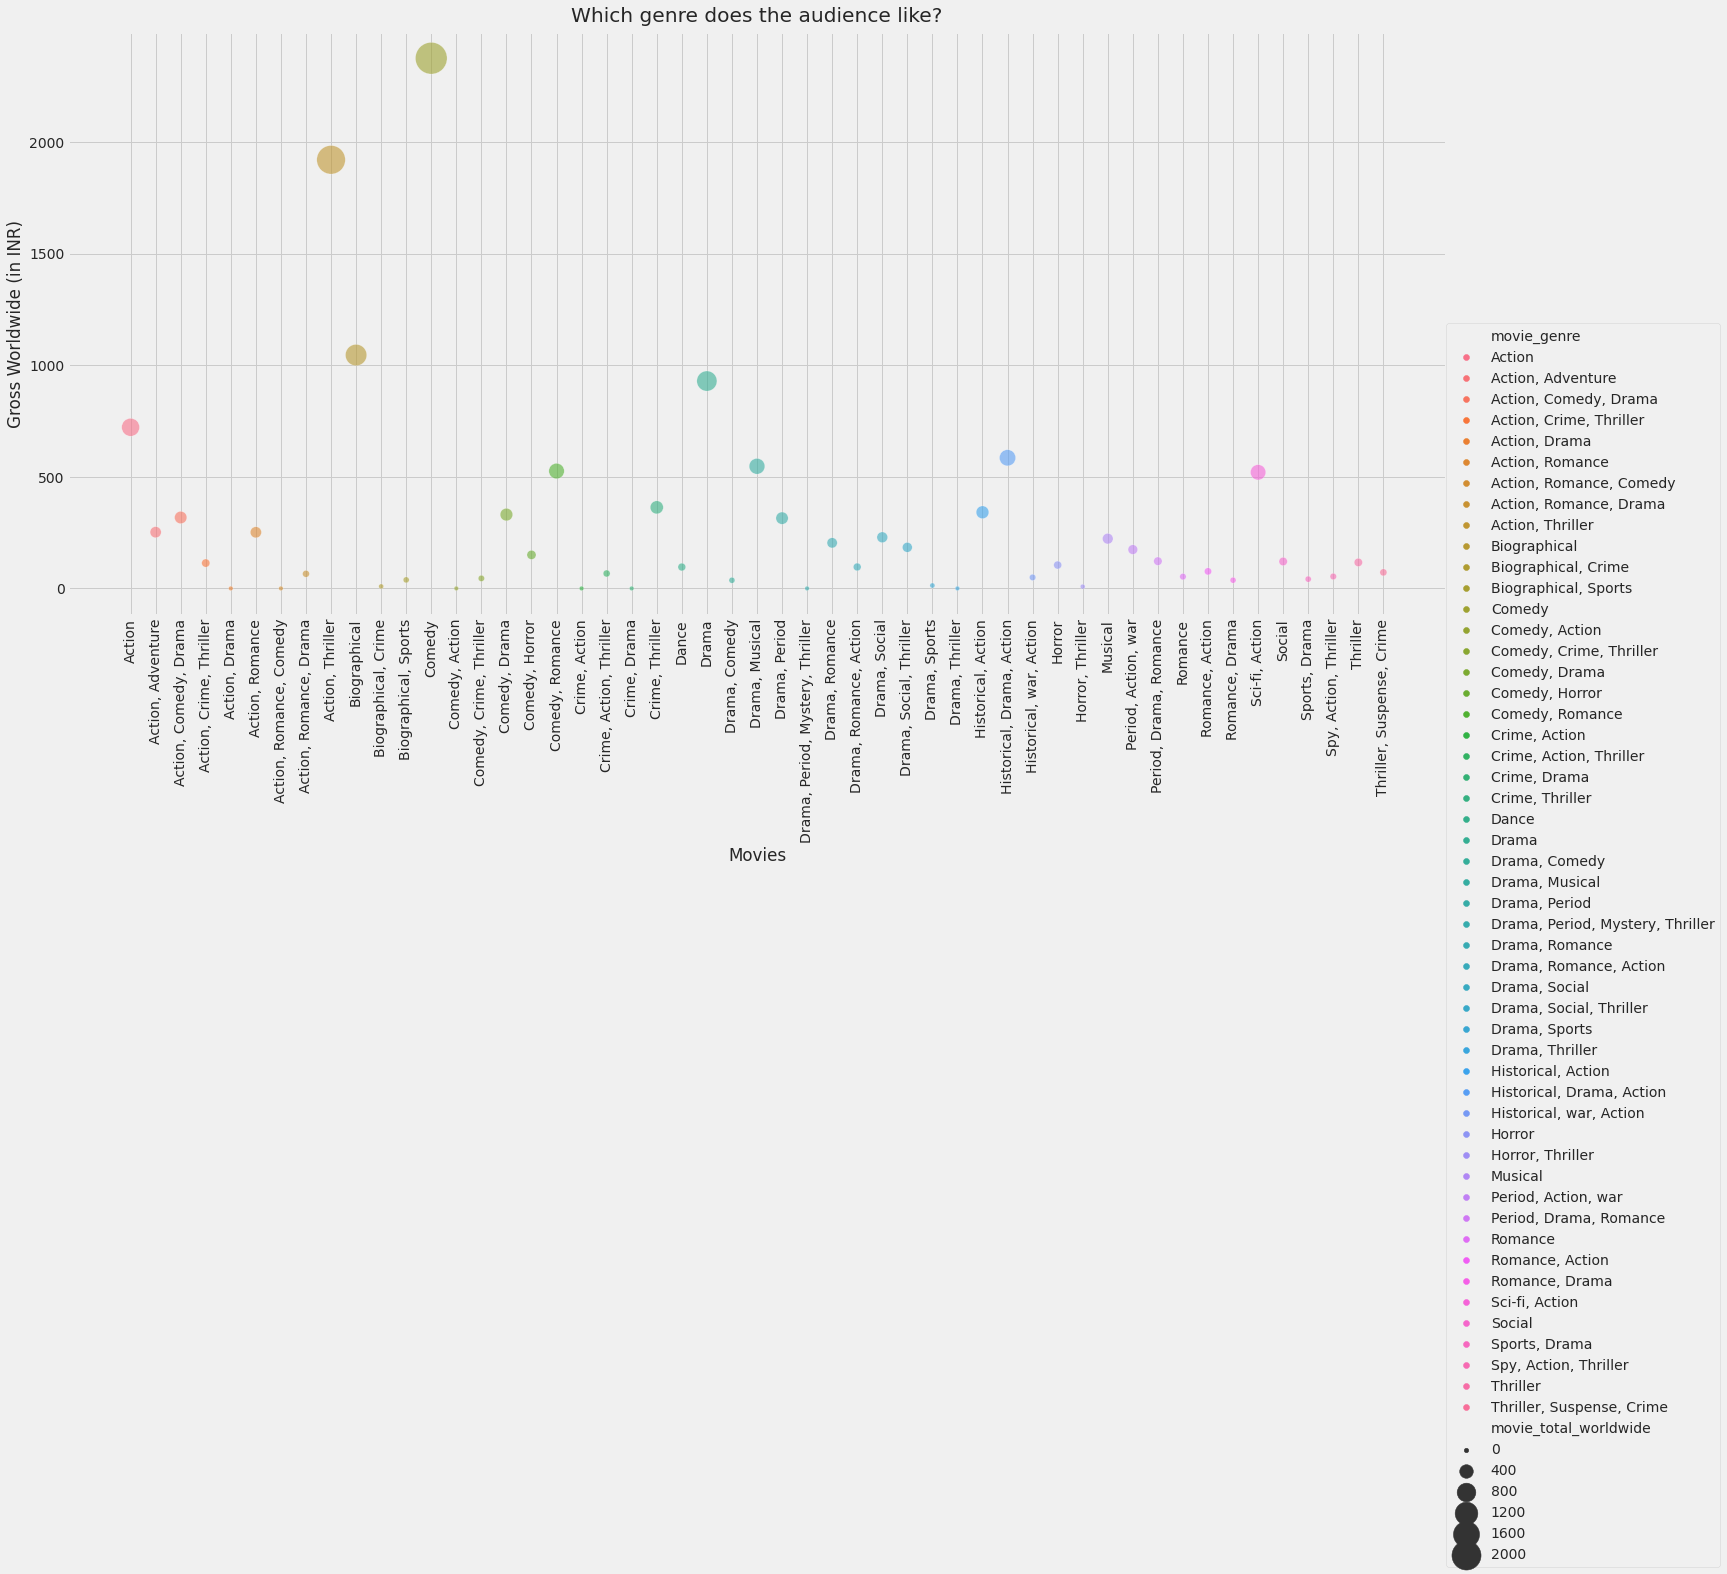

In [272]:
topgenre = data.groupby(["movie_genre"])["movie_total_worldwide"].sum().reset_index()
plt.figure(figsize=(22,10))
sns.scatterplot(x="movie_genre",y="movie_total_worldwide",size= "movie_total_worldwide", hue="movie_genre",data=topgenre,alpha=0.6,sizes=(20, 1000))
plt.xticks(rotation='vertical')
plt.title('Which genre does the audience like?', loc='center', pad=10)
plt.xlabel("Movies")
plt.legend(loc=2, bbox_to_anchor=(1, 0.5), borderaxespad=0)
plt.ylabel("Gross Worldwide (in INR)")
plt.show()
# fig = px.scatter(topgenre,'movie_genre','movie_total_worldwide',size="movie_total_worldwide",color="movie_genre",title="Which Genre is most liked by Audience")
# HTML(fig.to_html())

## Insights:

- From the previous wordcloud about genres, we infered that Action, Drama and its related genres were the most liked ny ht emovie going audience.

- This trend has changes in the last few years since " Comedy" is now the most like genre along with Action and Thriller

- This show a change in the liking of the audience where they ask for more diversity in movie genres



# % of movies released per year

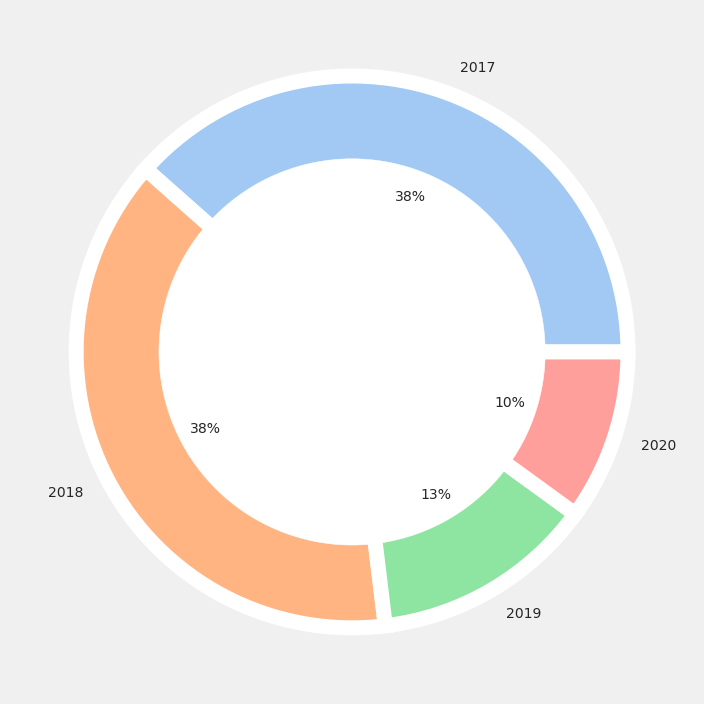

In [273]:
years=data["release_year"].value_counts().to_list()
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(18,10))
my_circle = plt.Circle( (0,0), 0.7, color='white')
labels=[2017, 2018, 2019, 2020]
plt.pie(years,labels=labels,colors = colors, autopct='%.0f%%', wedgeprops = { 'linewidth' : 15, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.tight_layout()
plt.show()

# fig = px.pie(data,'release_year','movie_total_worldwide',title="In Which Year Most Profit Collected")
# HTML(fig.to_html())

## Directors with highest movie earnings

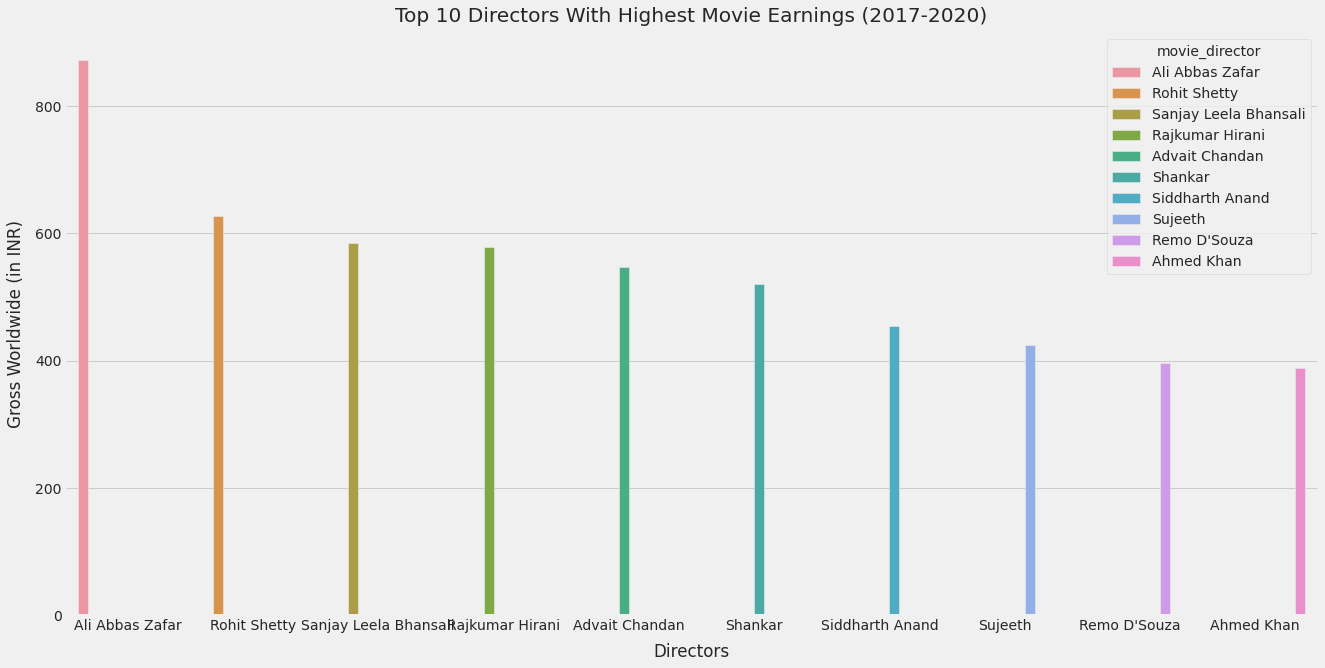

In [274]:
topdir = data.groupby(["movie_director"])["movie_total_worldwide"].sum().reset_index()
topdir=topdir.sort_values("movie_total_worldwide",ascending=False)
topdir=topdir.head(10)

plt.figure(figsize=(20,10))
sns.barplot(y="movie_total_worldwide",x="movie_director",data=topdir, hue="movie_director")
plt.title('Top 10 Directors With Highest Movie Earnings (2017-2020)', loc='center', pad=10)
# plt.xticks(rotation=60)
plt.xlabel("Directors", labelpad=10)
plt.ylabel("Gross Worldwide (in INR)", labelpad=10)
plt.show()


# fig = px.bar(topdir,"movie_director","movie_total_worldwide",title="Top 10 Directors With Highest Movie Earnings ",color="movie_director")
# HTML(fig.to_html())

## Insights: 

The above barplot does not reveal much since it just an extension of the bar graph of highest grossing movies


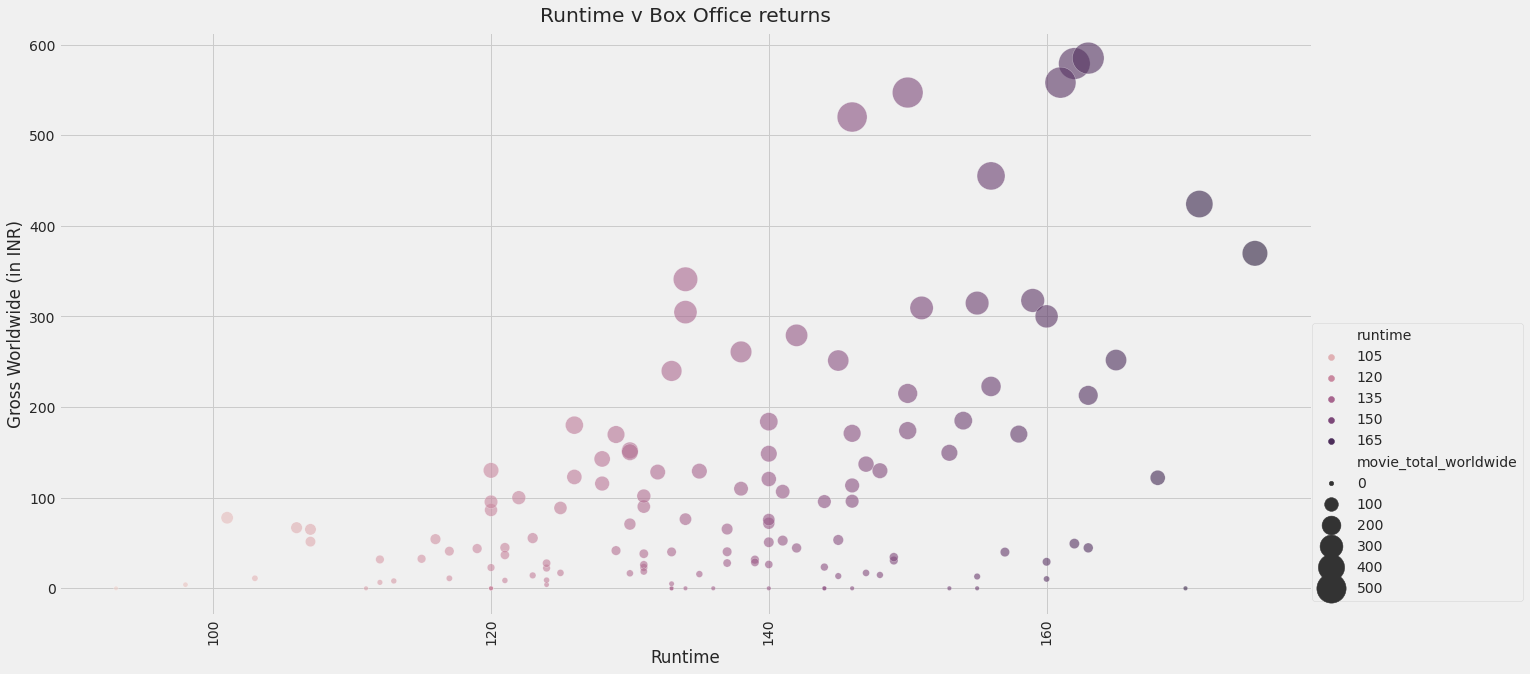

In [275]:
# Finiding relationship between runtime and box office collections

plt.figure(figsize=(20,10))
sns.scatterplot(x="runtime",y="movie_total_worldwide",size="movie_total_worldwide", hue="runtime",data=data,alpha=0.6,sizes=(20, 1000))
plt.xticks(rotation='vertical')
plt.title('Runtime v Box Office returns', loc='center', pad=10)
plt.xlabel("Runtime")
plt.legend(loc=2, bbox_to_anchor=(1, 0.5), borderaxespad=0)
plt.ylabel("Gross Worldwide (in INR)")
plt.show()


# fig = px.scatter(data, x="runtime", y="movie_total_worldwide", color="release_year",
#                  size='movie_total_worldwide')
# HTML(fig.to_html())

## Insights

- The scatterplotrells us that the highest grossing mvoies have runtime sover 160+
- This also validates our earlier plot where we had an average runtime of 140+ minutes for movies between 1950-2019

Text(0.5, 1.0, 'Domestic Gross of Indian Movies by Month')

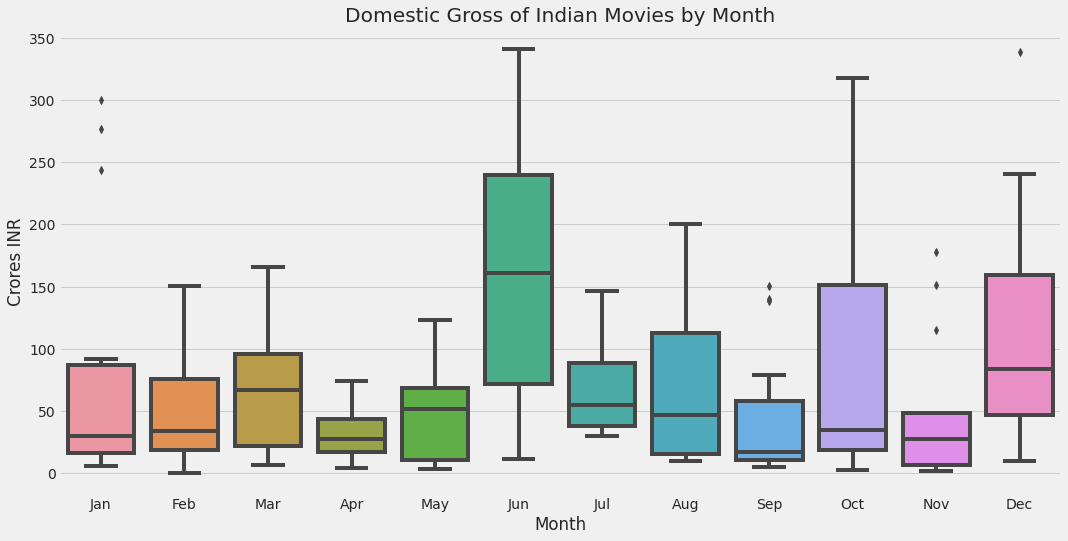

In [276]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
          "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (16, 8))
sns.boxplot(x = "release_month", y = "movie_total", data = data, order = months)
plt.ylabel("Crores INR")
plt.xlabel("Month")
plt.title("Domestic Gross of Indian Movies by Month")

Text(0.5, 1.0, 'Worldwide Gross of Indian Movies by Month')

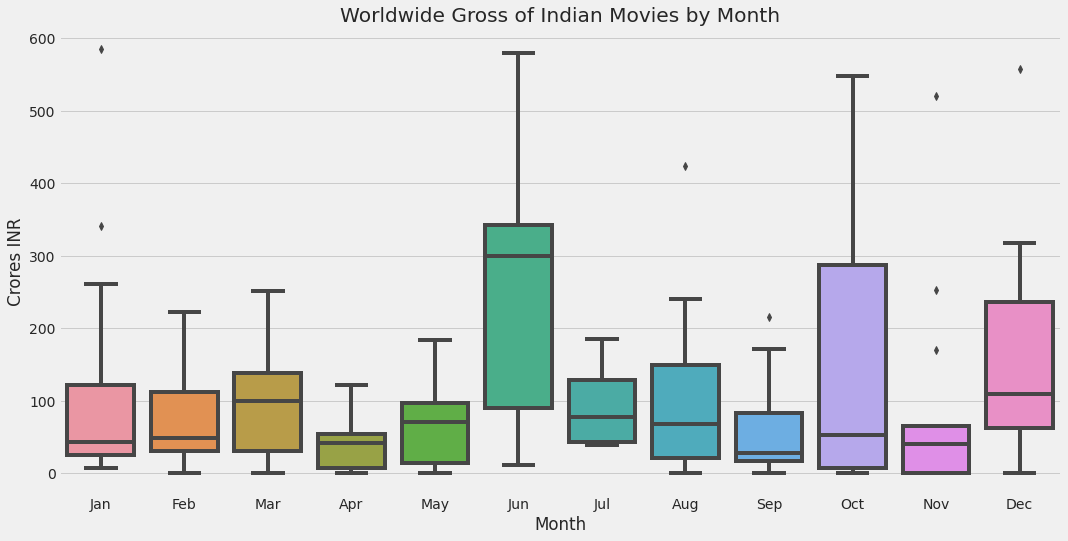

In [277]:
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (16, 8))
sns.boxplot(x = "release_month", y = "movie_total_worldwide", data = data, order = months)
plt.ylabel("Crores INR")
plt.xlabel("Month")
plt.title("Worldwide Gross of Indian Movies by Month")

## Insights:    

- The boxplots gives us a range of earnings per month

- The boxplots are moslty similar theought the year except for months like Oct and Dec

- These months have extedned holidays owing to festivals etc which makes them viable for a movie to be released during this time

- The earnings for Jun is an outlier since it is directly influence by one movie in the dataset